<a href="https://colab.research.google.com/github/Abdullah-47/Brain-Tumor-Classifier/blob/main/best_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creator Name: Abdullah Ansari
##Project Name: Brain Tumor Classification
##Project Type: Image Classification (CNN)
###GitHub Link: https://github.com/Abdullah-47/Brain-Tumor-Classifier

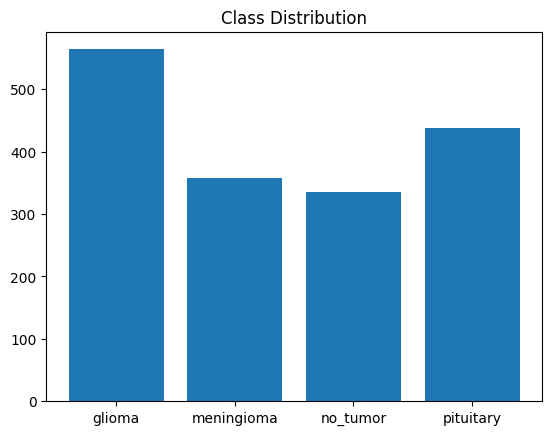

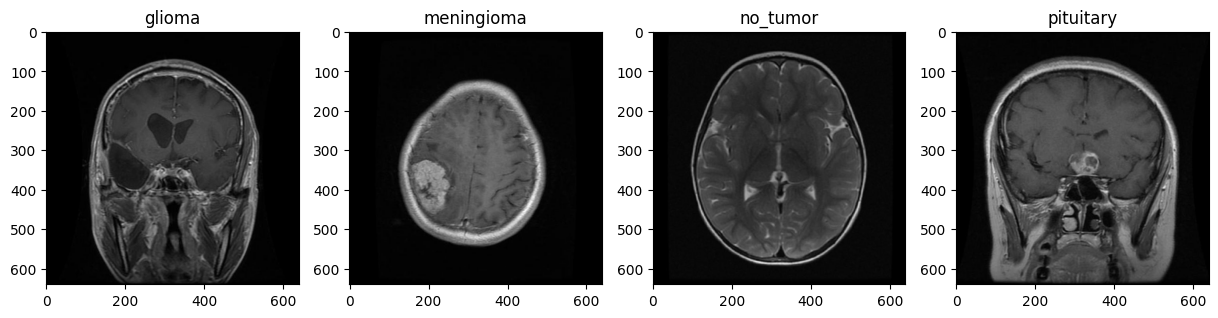

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = 'brain_mri/train'
val_dir = 'brain_mri/valid'
test_dir = 'brain_mri/test'

# Check class distribution
def plot_class_distribution(path):
    classes = os.listdir(path)
    counts = [len(os.listdir(os.path.join(path, cls))) for cls in classes]
    plt.bar(classes, counts)
    plt.title('Class Distribution')
    plt.show()

plot_class_distribution(train_dir)

# Sample image visualization
def plot_sample_images(path, num_samples=4):
    fig, axes = plt.subplots(1, num_samples, figsize=(15,5))
    for i, cls in enumerate(os.listdir(path)):
        img_path = os.path.join(path, cls, os.listdir(os.path.join(path, cls))[0])
        img = plt.imread(img_path)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(cls)
    plt.show()

plot_sample_images(train_dir)

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation/test generators (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data flows
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()
cnn_model.summary()

c:\Users\ansar\Downloads\Labmentix Internship\Weekly Projects\Brain Tumor MRI Image Classification\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,596 (84.86 MB)

 Trainable params: 22,246,148 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

def create_transfer_model():
    base_model = ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3)
    )

    # Freeze base layers
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

transfer_model = create_transfer_model()
transfer_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import class_weight
import numpy as np

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))


# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train CNN with class weights
print("Training CNN with class weights:")
cnn_history = cnn_model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint],
    class_weight=class_weights_dict # Add class weights here
)

# Train Transfer Learning model (ResNet50) with class weights
print("\nTraining ResNet50 with class weights:")
transfer_history = transfer_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint],
    class_weight=class_weights_dict # Add class weights here
)

# Fine-tuning (unfreeze top layers) with class weights
transfer_model.trainable = True
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

print("\nFine-tuning ResNet50 with class weights:")
transfer_history_fine = transfer_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint],
    class_weight=class_weights_dict # Add class weights here
)

Training CNN with class weights:


c:\Users\ansar\Downloads\Labmentix Internship\Weekly Projects\Brain Tumor MRI Image Classification\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 984ms/step - accuracy: 0.4772 - loss: 20.8053

53/53 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.4776 - loss: 20.6514 - val_accuracy: 0.2351 - val_loss: 18.1463
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 985ms/step - accuracy: 0.4110 - loss: 1.7213

53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4110 - loss: 1.7196 - val_accuracy: 0.3207 - val_loss: 45.5664
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.4441 - loss: 1.3240 - val_accuracy: 0.3068 - val_loss: 36.3135
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4426 - loss: 1.2800 - val_accuracy: 0.3127 - val_loss: 29.2487
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4802 - loss: 1.2997 - val_accuracy: 0.2331 - val_loss: 16.4413
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4928 - loss: 1.1762 - val_accuracy: 0.2769 - val_loss: 6.2990
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5158 - loss: 1.1025 - val_accuracy: 0.2311 - val_loss: 3.4836
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 980ms/step - accuracy: 0.4861 - loss: 1.1172

53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4866 - loss: 1.1172 - val_accuracy: 0.5976 - val_loss: 0.9892
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 988ms/step - accuracy: 0.5228 - loss: 1.0580

53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5227 - loss: 1.0584 - val_accuracy: 0.7649 - val_loss: 0.9066
Epoch 10/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5723 - loss: 0.9782 - val_accuracy: 0.7251 - val_loss: 0.8433
Epoch 11/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5411 - loss: 1.0800 - val_accuracy: 0.7550 - val_loss: 0.7292
Epoch 12/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5938 - loss: 0.9929 - val_accuracy: 0.6355 - val_loss: 0.8590
Epoch 13/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5236 - loss: 1.0844 - val_accuracy: 0.6853 - val_loss: 0.8453
Epoch 14/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5454 - loss: 1.0159 - val_accuracy: 0.7191 - val_loss: 0.7681
Epoch 15/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5911 - loss: 0.9971 - val_accuracy: 0.5797 - val_loss: 1.1650
Epoch 16/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5748 - loss: 1.0180 - val_accuracy: 0.7410 - val_loss: 0.7


CNN Evaluation:


c:\Users\ansar\Downloads\Labmentix Internship\Weekly Projects\Brain Tumor MRI Image Classification\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.78      0.93      0.85        80
  meningioma       0.65      0.51      0.57        63
    no_tumor       0.89      0.63      0.74        49
   pituitary       0.75      0.93      0.83        54

    accuracy                           0.76       246
   macro avg       0.77      0.75      0.75       246
weighted avg       0.76      0.76      0.75       246

Balanced Accuracy: 0.7479
Macro-averaged F1-score: 0.7454

Confusion Matrix:


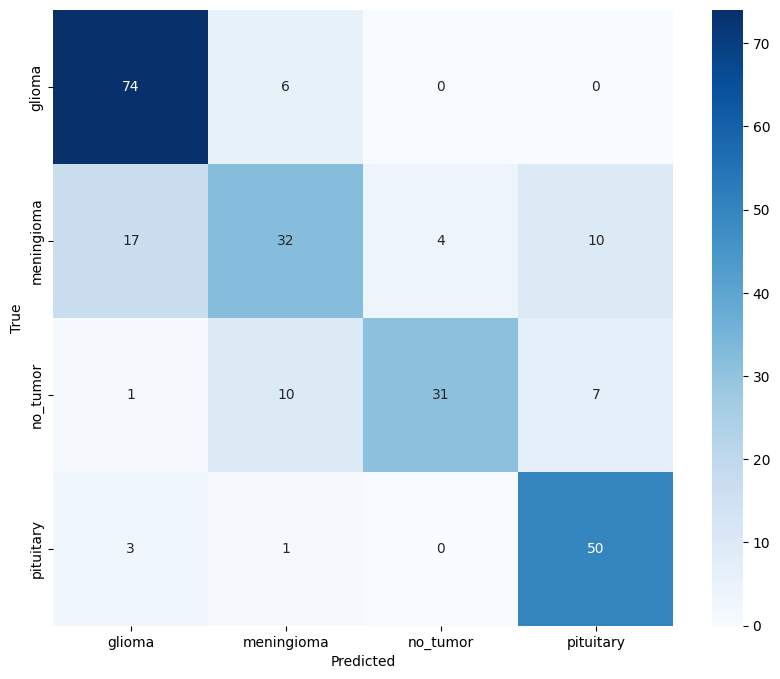


ResNet50 Evaluation:
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 987ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.71      0.71      0.71        80
  meningioma       0.54      0.43      0.48        63
    no_tumor       0.67      0.67      0.67        49
   pituitary       0.75      0.93      0.83        54

    accuracy                           0.68       246
   macro avg       0.67      0.69      0.67       246
weighted avg       0.67      0.68      0.67       246

Balanced Accuracy: 0.6851
Macro-averaged F1-score: 0.6726

Confusion Matrix:


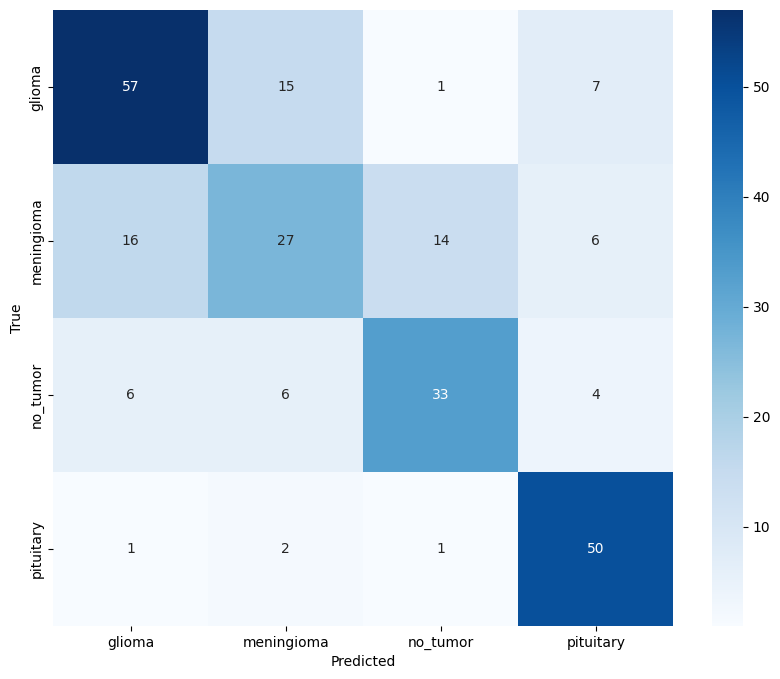

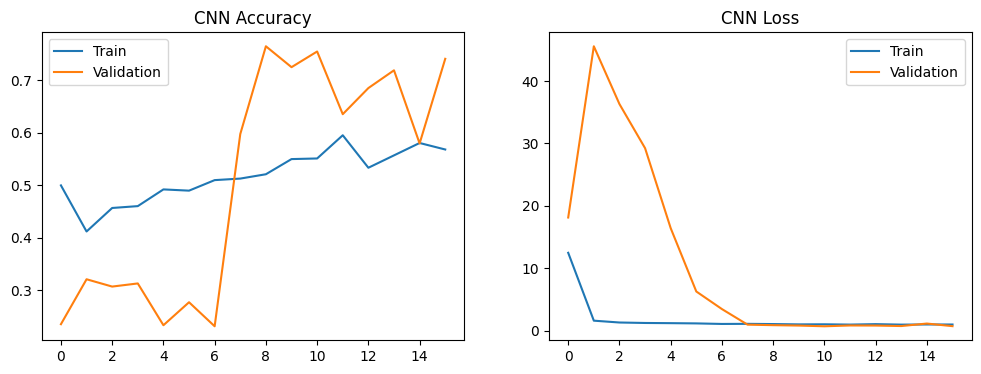

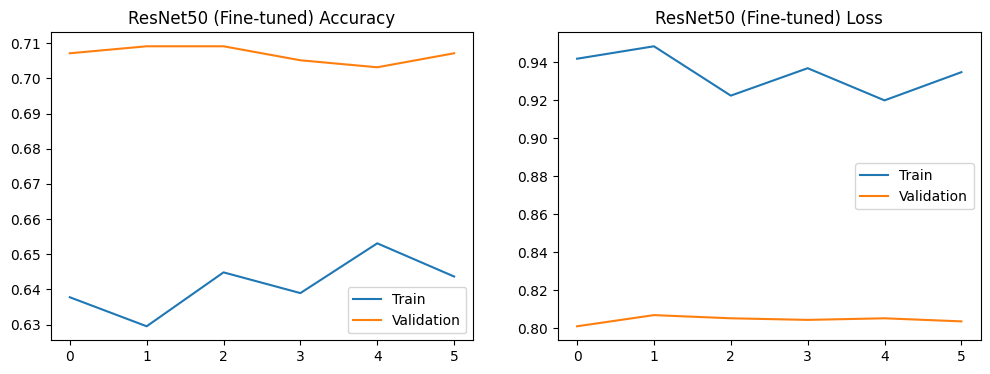

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, f1_score
import matplotlib.pyplot as plt

def evaluate_model(model, generator):
    # Get true labels and predictions
    y_true = generator.classes
    y_pred_probs = model.predict(generator)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=generator.class_indices.keys()))

    # Balanced accuracy
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    print(f"Balanced Accuracy: {balanced_acc:.4f}")

    # Macro-averaged F1-score
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    print(f"Macro-averaged F1-score: {macro_f1:.4f}")

    # Confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=generator.class_indices.keys(),
                yticklabels=generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate both models
print("\nCNN Evaluation:")
evaluate_model(cnn_model, test_generator)

print("\nResNet50 Evaluation:")
evaluate_model(transfer_model, test_generator)

# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

plot_history(cnn_history, 'CNN')
plot_history(transfer_history_fine, 'ResNet50 (Fine-tuned)')